In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
import os

In [231]:
df_native = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/PETfold_Excel/native.xlsx"))
df_sissiz_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/PETfold_Excel/sissiz_mono.xlsx"))
df_sissiz_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/PETfold_Excel/sissiz_di.xlsx"))
df_multiperm_mono = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/PETfold_Excel/multiperm_mono.xlsx"))
df_multiperm_di = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/PETfold_Excel/multiperm_di.xlsx"))
df_aln_shuffle = pd.DataFrame(pd.read_excel("/mnt/bernhard/Masterarbeit/2.Versuch/Native_Data/PETfold_Excel/alifoldz.xlsx"))

save_path = "/mnt/bernhard/Masterarbeit/2.Versuch/Plots/Native/PETfold/"

In [232]:
df_native.head(10)

,Score,File
0,0.613079,RF00001_46.txt
1,0.677393,L1RNA_48.txt
2,0.657162,RF00001_05.txt
3,0.734818,RF00005_52.txt
4,0.754894,L1RNA_56.txt
5,0.301427,ncSRA_AF092038_H3_and_H4_07.txt
6,0.656352,RF00010_52.txt
7,0.538799,S8RNA_13.txt
8,0.590734,RF00167_05.txt
9,0.611285,L10RNA_108.txt


In [233]:
df_native[['Score']].describe()

,Score
count,826.000000
mean,0.589541
std,0.127934
min,0.000000
25%,0.522146
50%,0.607996
75%,0.696190
max,0.779627


In [234]:
df_sissiz_mono.head(10)

,Score,File
0,0.277183,neg_sample_SISSIz_mono_L10RNA_74.txt
1,0.308992,neg_sample_SISSIz_mono_RF00001_32.txt
2,0.314995,neg_sample_SISSIz_mono_L10RNA_92.txt
3,0.339992,neg_sample_SISSIz_mono_L10RNA_26.txt
4,0.312361,neg_sample_SISSIz_mono_RF00010_08.txt
5,0.295722,neg_sample_SISSIz_mono_L10RNA_58.txt
6,0.273176,neg_sample_SISSIz_mono_RF00167_09.txt
7,0.293297,neg_sample_SISSIz_mono_L4RNA_20.txt
8,0.349042,neg_sample_SISSIz_mono_L10RNA_48.txt
9,0.000000,neg_sample_SISSIz_mono_ar15_08.txt


In [235]:
df_sissiz_mono[['Score']].describe()

,Score
count,826.000000
mean,0.321150
std,0.059935
min,0.000000
25%,0.283326
50%,0.307532
75%,0.346579
max,0.685976


In [236]:
df_sissiz_di.head(10)

,Score,File
0,0.363320,neg_sample_SISSIz_di_L10RNA_37.txt
1,0.427236,neg_sample_SISSIz_di_L20RNA_06.txt
2,0.283872,neg_sample_SISSIz_di_RF00010_29.txt
3,0.267028,neg_sample_SISSIz_di_RF00001_60.txt
4,0.288409,neg_sample_SISSIz_di_RF00001_30.txt
5,0.270887,neg_sample_SISSIz_di_S1RNA_22.txt
6,0.285673,neg_sample_SISSIz_di_RF00010_54.txt
7,0.285471,neg_sample_SISSIz_di_L10RNA_38.txt
8,0.252778,neg_sample_SISSIz_di_ar15_02.txt
9,0.302675,neg_sample_SISSIz_di_L10RNA_60.txt


In [237]:
df_sissiz_di[['Score']].describe()

,Score
count,826.000000
mean,0.322388
std,0.059492
min,0.000000
25%,0.284818
50%,0.306992
75%,0.350924
max,0.728095


In [238]:
df_multiperm_mono.head(10)

,Score,File
0,0.291119,neg_sample_MULTIPERM_mono_RF00001_77.txt
1,0.382109,neg_sample_MULTIPERM_mono_L10RNA_29.txt
2,0.288112,neg_sample_MULTIPERM_mono_RF00010_41.txt
3,0.310867,neg_sample_MULTIPERM_mono_S8RNA_06.txt
4,0.296965,neg_sample_MULTIPERM_mono_L20RNA_13.txt
5,0.308214,neg_sample_MULTIPERM_mono_HOTAIR_D4_01.txt
6,0.288692,neg_sample_MULTIPERM_mono_RF00001_21.txt
7,0.437247,neg_sample_MULTIPERM_mono_L1RNA_18.txt
8,0.253631,neg_sample_MULTIPERM_mono_ncSRA_AF092038_H3_an...
9,0.306345,neg_sample_MULTIPERM_mono_L10RNA_19.txt


In [239]:
df_multiperm_mono[['Score']].describe()

,Score
count,826.000000
mean,0.325969
std,0.048097
min,0.000000
25%,0.299660
50%,0.318881
75%,0.340692
max,0.574493


In [240]:
df_multiperm_di.head(10)

,Score,File
0,0.324199,neg_sample_MULTIPERM_di_RF00167_03.txt
1,0.330404,neg_sample_MULTIPERM_di_L10RNA_13.txt
2,0.316694,neg_sample_MULTIPERM_di_RF00167_08.txt
3,0.324490,neg_sample_MULTIPERM_di_S7RNA_22.txt
4,0.311465,neg_sample_MULTIPERM_di_RF00005_131.txt
5,0.293518,neg_sample_MULTIPERM_di_RF00005_43.txt
6,0.295433,neg_sample_MULTIPERM_di_S8RNA_06.txt
7,0.392553,neg_sample_MULTIPERM_di_RF00001_85.txt
8,0.356833,neg_sample_MULTIPERM_di_RF00005_25.txt
9,0.320156,neg_sample_MULTIPERM_di_RF00167_18.txt


In [241]:
df_multiperm_di[['Score']].describe()

,Score
count,826.000000
mean,0.336388
std,0.054878
min,0.000000
25%,0.304014
50%,0.323576
75%,0.352780
max,0.669436


In [242]:
df_aln_shuffle.head(10)

,Score,File
0,0.361723,neg_sample_ALIFOLDz_S8RNA_05.txt
1,0.729684,neg_sample_ALIFOLDz_RF00005_91.txt
2,0.462570,neg_sample_ALIFOLDz_RF00001_88.txt
3,0.401417,neg_sample_ALIFOLDz_RF00001_82.txt
4,0.290037,neg_sample_ALIFOLDz_RF00001_04.txt
5,0.000000,neg_sample_ALIFOLDz_L10RNA_48.txt
6,0.000000,neg_sample_ALIFOLDz_L1RNA_87.txt
7,0.000000,neg_sample_ALIFOLDz_L10RNA_27.txt
8,0.612822,neg_sample_ALIFOLDz_RF00005_45.txt
9,0.000000,neg_sample_ALIFOLDz_S1RNA_11.txt


In [243]:
df_aln_shuffle[['Score']].describe()

,Score
count,820.000000
mean,0.302489
std,0.239123
min,0.000000
25%,0.000000
50%,0.346626
75%,0.472103
max,0.753930


## Score

/tmp/ipykernel_10460/729671900.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)
/tmp/ipykernel_10460/729671900.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
/tmp/ipykernel_10460/729671900.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
/tmp/ipykernel_10460/729671900.py:22: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')


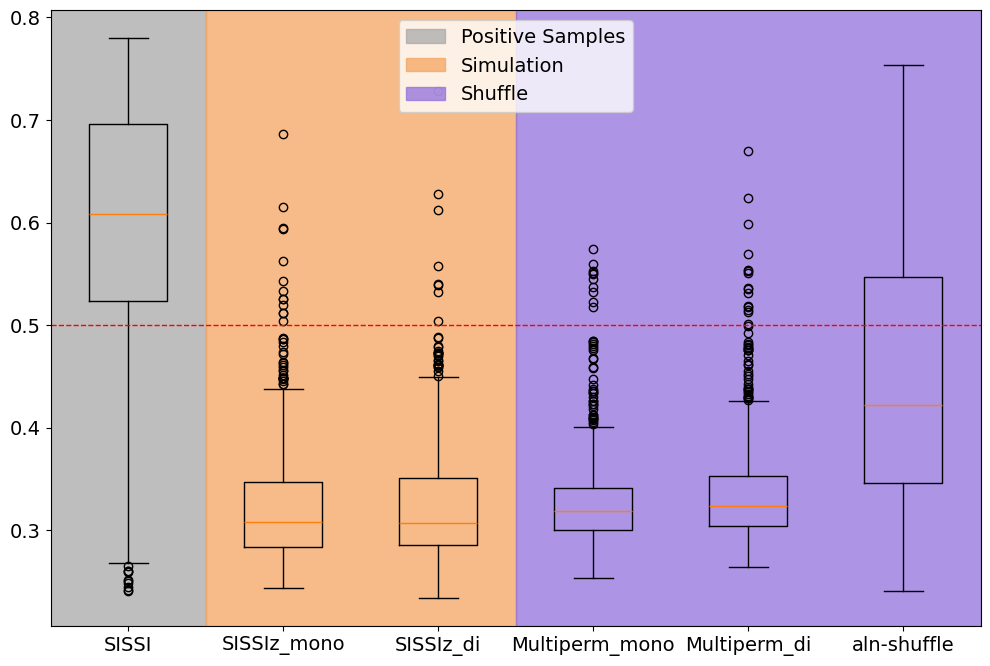

In [244]:
import matplotlib.pyplot as plt
import os

# Deine vorhandenen DataFrames
dataframes = [df_native, df_sissiz_mono, df_sissiz_di, df_multiperm_mono, df_multiperm_di, df_aln_shuffle]
labels = ['SISSI', 'SISSIz_mono', 'SISSIz_di', 'Multiperm_mono', 'Multiperm_di', 'aln-shuffle']
filtered_dataframes = [df[df['Score'] != 0] for df in dataframes]

data = [df['Score'] for df in filtered_dataframes]

plt.figure(figsize=(12, 8))
plt.boxplot(data, labels=labels)

# Thresholds einzeichnen
thresholds = [0.5]
for t in thresholds:
    plt.axhline(y=t, color='red', linestyle='--', linewidth=1)

# Bereiche farbig markieren
plt.axvspan(0.5, 1.5, color="darkgray", alpha=0.75, edgecolor="black", label='Positive Samples')
plt.axvspan(1.5, 3.5, color="sandybrown", alpha=0.75, edgecolor="black", label='Simulation')
plt.axvspan(3.5, 6.5, color="mediumpurple", alpha=0.75, edgecolor="black", label='Shuffle')

# Speichern optional
if save_path:
    filename = os.path.join(save_path, "PETfold: Boxplot Score with native samples.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')

# plt.title('PETfold: Boxplot Score with native samples')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
plt.legend()
plt.show()
